In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [94]:
sns.set()

In [95]:
stud = pd.read_csv('stud_math.csv')

In [96]:
display(stud.sample(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,...,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,...,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
345,GP,F,18,U,GT3,T,3.0,2.0,other,NaN,...,-9.0,yes,yes,yes,5.0,4.0,3.0,1.0,7.0,70.0
184,GP,F,16,U,GT3,T,3.0,2.0,other,other,...,-6.0,yes,yes,no,1.0,2.0,2.0,1.0,14.0,60.0
359,MS,F,18,NaN,LE3,T,1.0,1.0,at_home,services,...,-9.0,yes,yes,no,5.0,3.0,2.0,4.0,0.0,80.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,...,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
175,GP,M,17,U,LE3,T,4.0,3.0,teacher,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,4.0,4.0,45.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Предобработка

In [97]:
stud['studytime'].corr(stud['studytime, granular'])

-0.9999999999999988

In [98]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

In [99]:
stud.rename(columns={"Pstatus": "pstatus", "Medu": "medu", "Fedu": "fedu", 
                     "Mjob": "mjob", "Fjob": "fjob", "freetime": "free_time",
                     "traveltime": "travel_time", "studytime": "study_time",
                     "goout": "go_out"}, 
                     inplace=True) 

In [101]:
def print_hist(col):
    sns.distplot(stud[col])
    display(stud[col].describe())

In [191]:
def sns_boxplot_score(list_num, list_no_num):
    for i in list_num:
        for parametr in list_no_num:
            fig, ax = plt.subplots(figsize=(14, 4))
            box_plot = sns.boxplot(x=i, y='score', data=stud, hue=parametr, ax=ax)
            print(
                f"  По оси x: {i}\n  По оси y: score\n \033[31m Параметр: {parametr}")
            plt.xticks(rotation=90)
            plt.show()

In [138]:
def sns_boxplot(list_value):
    for i in list_value:
        fig, ax = plt.subplots(figsize=(14, 4))
        box_plot = sns.boxplot(x=i, y='score', data=stud, ax=ax)
        box_plot = sns.swarmplot(x=i, y='score', data=stud, color=".25")
        print(f" По оси x: {i}\n По оси y: score")
        plt.show()

# Анализл данных

In [103]:
stud.describe()

,age,medu,fedu,travel_time,study_time,failures,famrel,free_time,go_out,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Общее колличество значений не велико (относительно генеральной совокупности всех учеников), успеваемость берется по 100 бальной системе

In [198]:
for i in stud.columns:
    nan = round(stud[i].isnull().sum() / len(stud[i]) * 100, 3)
    if nan > 5:
        print(f'Пропущено более 5% значений в столбце {i}: {nan}%')

Пропущено более 5% значений в столбце famsize: 6.835%
Пропущено более 5% значений в столбце pstatus: 11.392%
Пропущено более 5% значений в столбце fedu: 6.076%
Пропущено более 5% значений в столбце fjob: 9.114%
Пропущено более 5% значений в столбце guardian: 7.848%
Пропущено более 5% значений в столбце travel_time: 7.089%
Пропущено более 5% значений в столбце failures: 5.57%
Пропущено более 5% значений в столбце famsup: 9.873%
Пропущено более 5% значений в столбце paid: 10.127%
Пропущено более 5% значений в столбце higher: 5.063%
Пропущено более 5% значений в столбце internet: 8.608%
Пропущено более 5% значений в столбце romantic: 7.848%
Пропущено более 5% значений в столбце famrel: 6.835%


Более 10% пропусков имеют только pstatus (совместное проживание родителей), paid (дополнительные платные занятия по математике)

In [184]:
for i in ['age', 'medu', 'fedu', 'travel_time', 'study_time', 'failures', 
          'famrel', 'free_time', 'go_out', 'health', 'absences', 'score']:
    IQR = stud[i].quantile(0.75) - stud[i].quantile(0.25)
    blowout = len(stud[(stud[i] < (stud[i].quantile(0.25) - 1.5*IQR))]) + \
              len(stud[(stud[i] > (stud[i].quantile(0.75) + 1.5*IQR))])
    blowout_percent = round(blowout / len(stud[i]) * 100, 3)
    if blowout != 0:
        print(f'В столбце {i} имеется {blowout} выбросов,что составляет {blowout_percent}%')

В столбце age имеется 1 выбросов,что составляет 0.253%
В столбце fedu имеется 3 выбросов,что составляет 0.759%
В столбце travel_time имеется 7 выбросов,что составляет 1.772%
В столбце study_time имеется 27 выбросов,что составляет 6.835%
В столбце failures имеется 80 выбросов,что составляет 20.253%
В столбце famrel имеется 25 выбросов,что составляет 6.329%
В столбце free_time имеется 18 выбросов,что составляет 4.557%
В столбце absences имеется 17 выбросов,что составляет 4.304%


имеется довольно много выбросов, особенно в столбце failures

C:\Users\kuklin.a\AppData\Local\Temp/ipykernel_7108/2540827773.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(stud.corr(), dtype=np.bool))


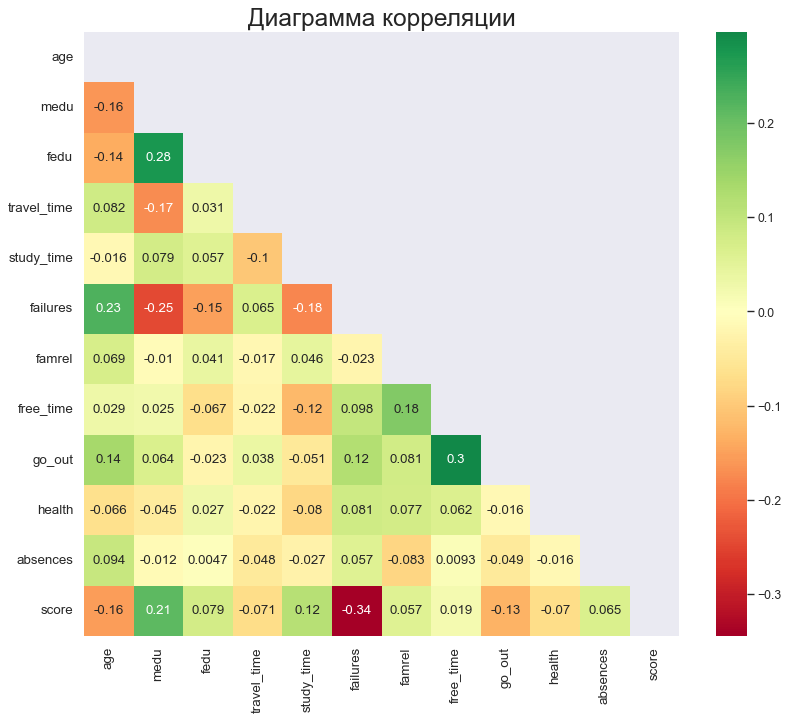

In [196]:
plt.figure(figsize=(12, 10), dpi=80)
mask = np.triu(np.ones_like(stud.corr(), dtype=np.bool))
sns.heatmap(stud.corr(), mask=mask, xticklabels=stud.corr().columns, yticklabels=stud.corr().columns,
            cmap='RdYlGn', center=0, annot=True)
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наибольшее влияние на успеваемость оказывают параметры (корреляция более 0.1) в порядке убывания:

failures - колличество внеучебных неудач (уменьшает успеваемость)

medu - образование матери (увеличивает успеваемость)

age - возраст (уменьшается успеваемость)

study_time - время на учебу помимо школы (увеличивает успеваемость)

go_out - время с друзьями (уменьшает успеваемость)

C:\Users\kuklin.a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

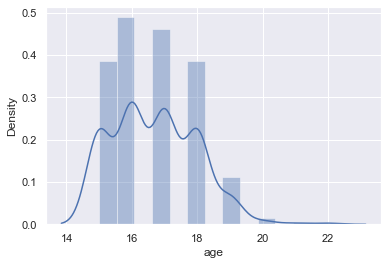

In [15]:
print_hist('age')

C:\Users\kuklin.a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

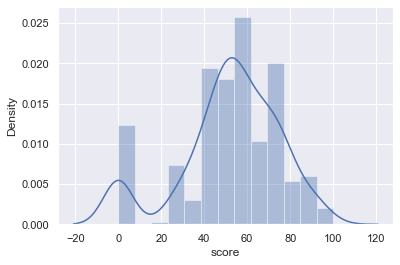

In [16]:
print_hist('score')

In [115]:
list_no_num = ['school', 'sex', 'address', 'famsize', 'pstatus', 
               'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
               'famsup', 'paid', 'activities', 'nursery', 'higher',
               'internet', 'romantic']

 По оси x: school
 По оси y: score


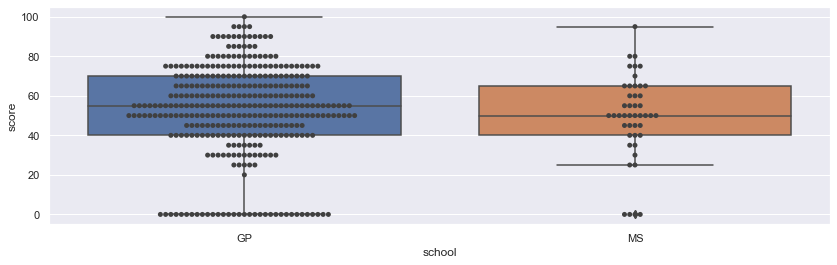

 По оси x: sex
 По оси y: score


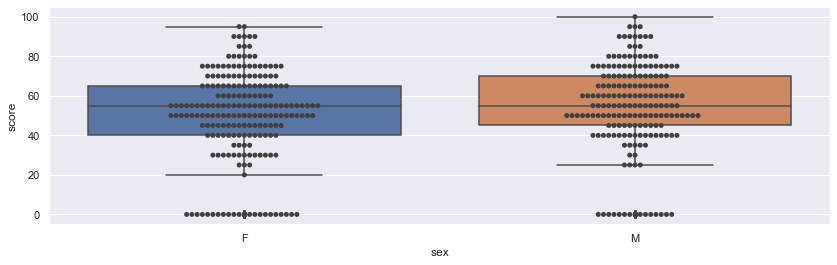

 По оси x: address
 По оси y: score


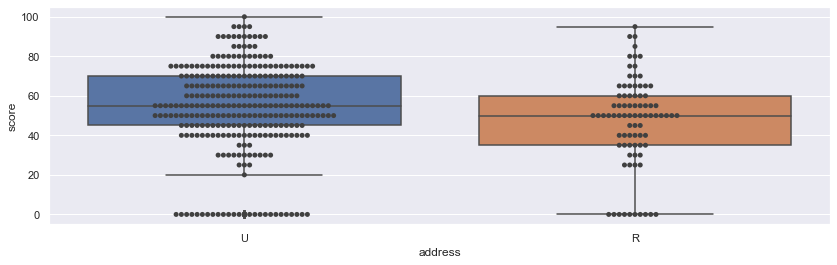

 По оси x: famsize
 По оси y: score


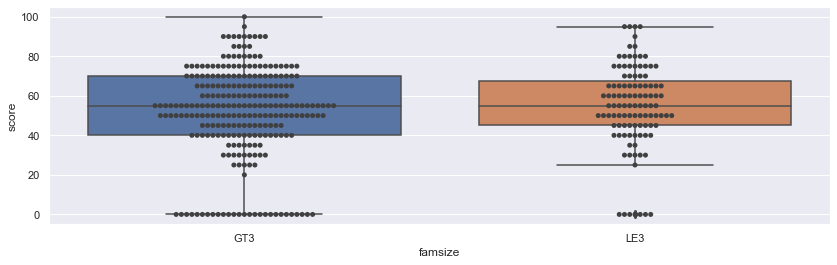

 По оси x: pstatus
 По оси y: score


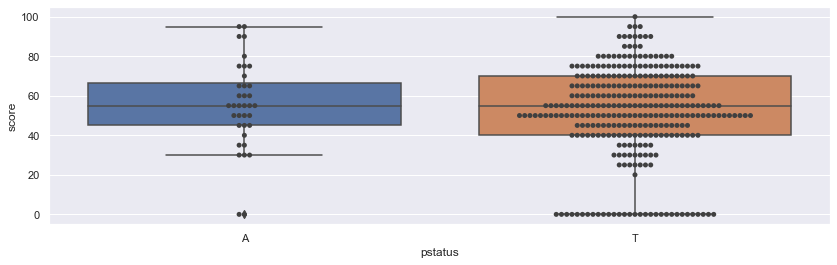

 По оси x: mjob
 По оси y: score


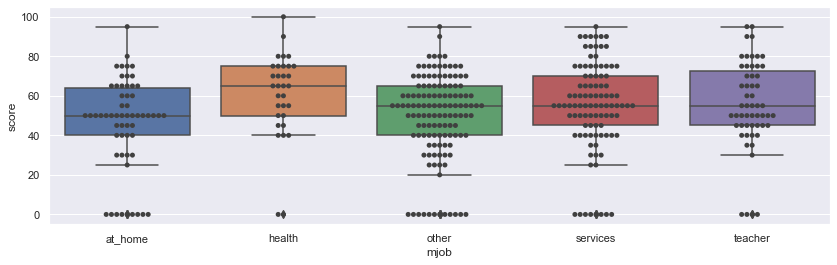

 По оси x: fjob
 По оси y: score


C:\Users\kuklin.a\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


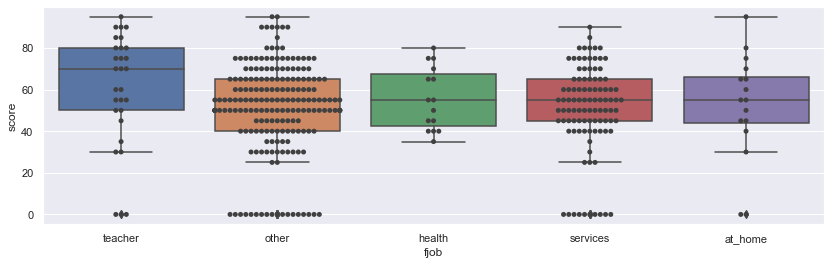

 По оси x: reason
 По оси y: score


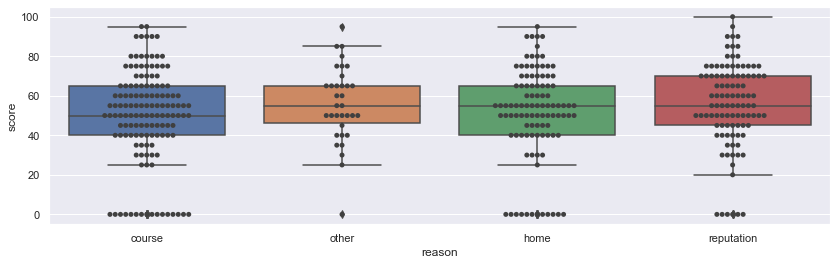

 По оси x: guardian
 По оси y: score


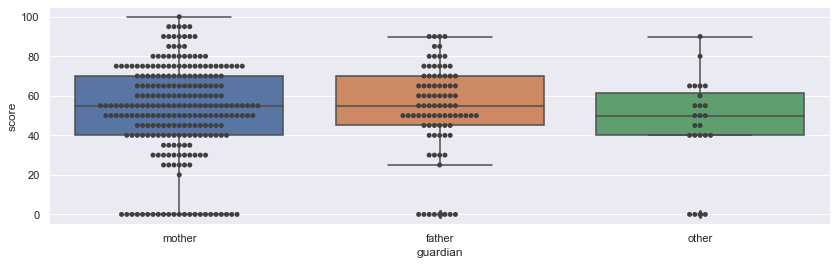

 По оси x: schoolsup
 По оси y: score


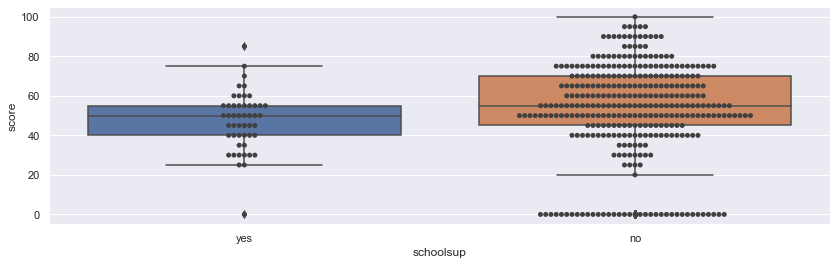

 По оси x: famsup
 По оси y: score


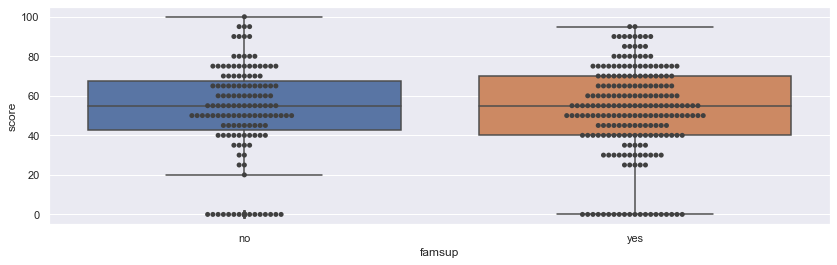

 По оси x: paid
 По оси y: score


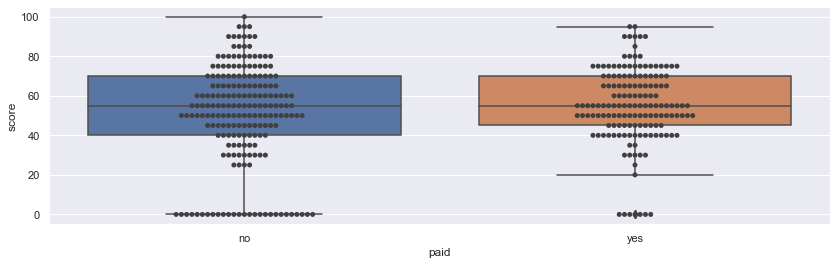

 По оси x: activities
 По оси y: score


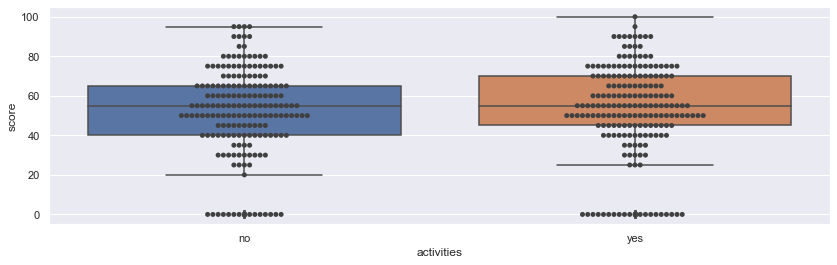

 По оси x: nursery
 По оси y: score


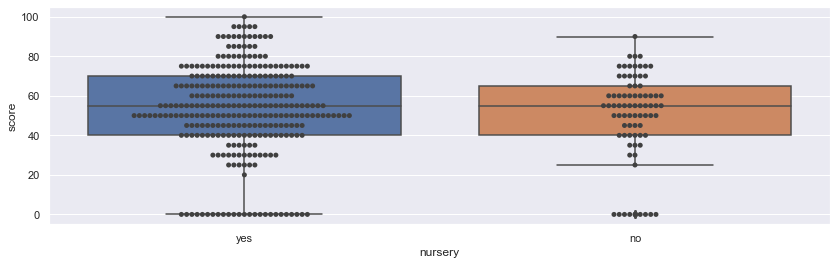

 По оси x: higher
 По оси y: score


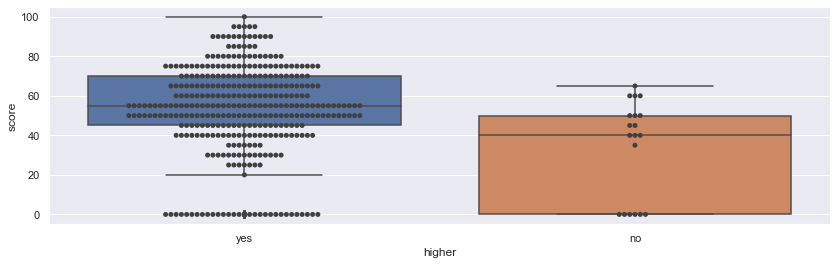

 По оси x: internet
 По оси y: score


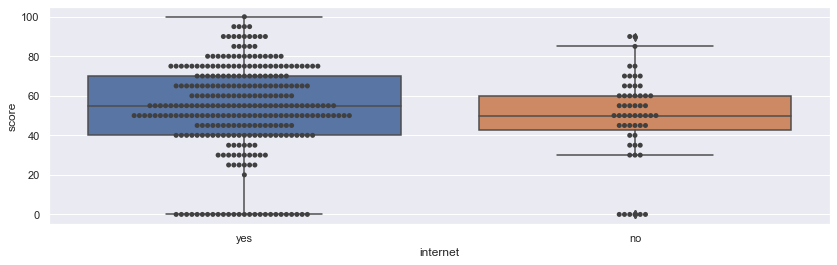

 По оси x: romantic
 По оси y: score


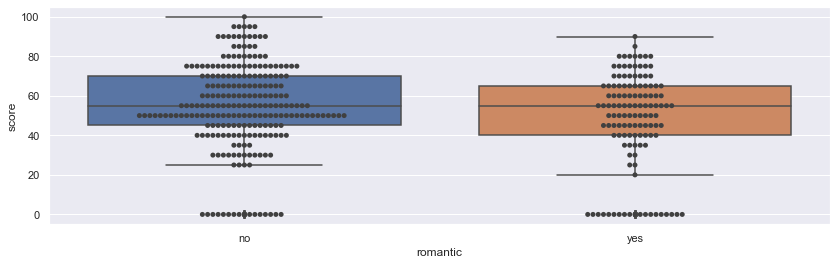

In [139]:
sns_boxplot(list_no_num)

Более высокие результаты показывают:

 address(U) - городские жители

fjob(teacher) - отец учитель

mjob(health) - мать врач

schoolsup(no) - дополнительная образовательная поддержка. Скорей всего вызвано тем, что дополнительные занятия дают  увеличение нагрузки на ученика, и как следствие уменьшение в успеваемости по смежным предметам

higher(yes) - стремление получить высшее образование

internet(yes) - наличие домашнего интернета

Более низкие результаты показывают:

reason(course) - выбор школы по образовательной программе 

guardian(other) - опекуны (другое), возможно подение вызвано детьми в приемных семьях

In [194]:
num_list = ['address', 'fjob', 'mjob', 'schoolsup', 'higher', 'internet', 'reason', 'guardian']

  По оси x: age
  По оси y: score
  Параметр: address


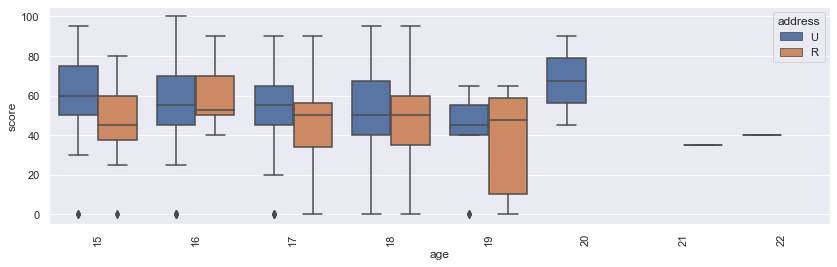

  По оси x: age
  По оси y: score
  Параметр: fjob


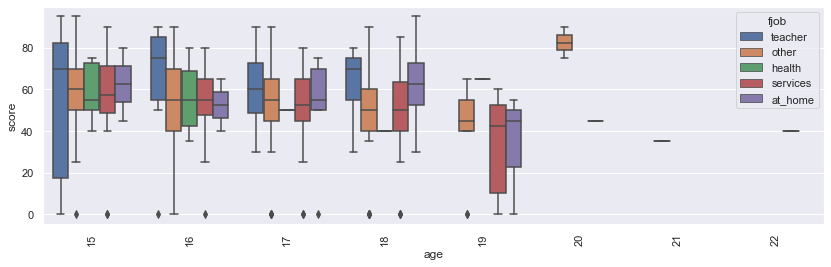

  По оси x: age
  По оси y: score
  Параметр: mjob


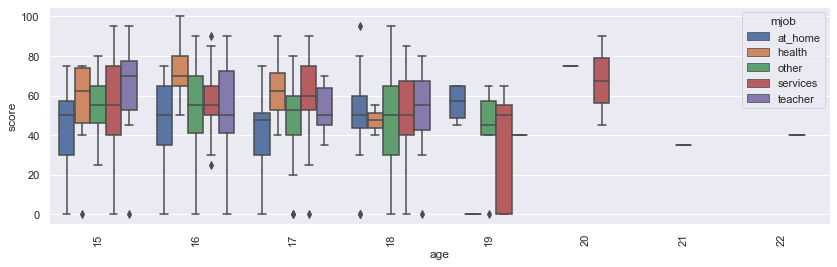

  По оси x: age
  По оси y: score
  Параметр: schoolsup


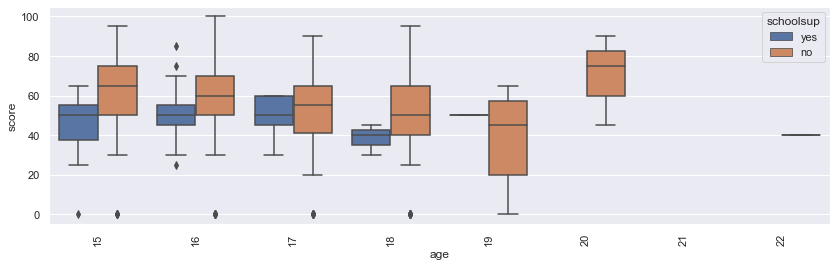

  По оси x: age
  По оси y: score
  Параметр: higher


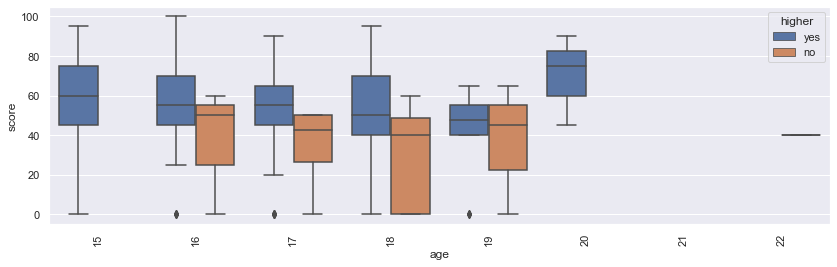

  По оси x: age
  По оси y: score
  Параметр: internet


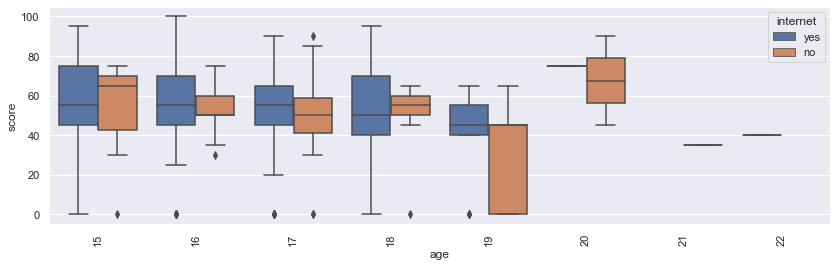

  По оси x: age
  По оси y: score
  Параметр: reason


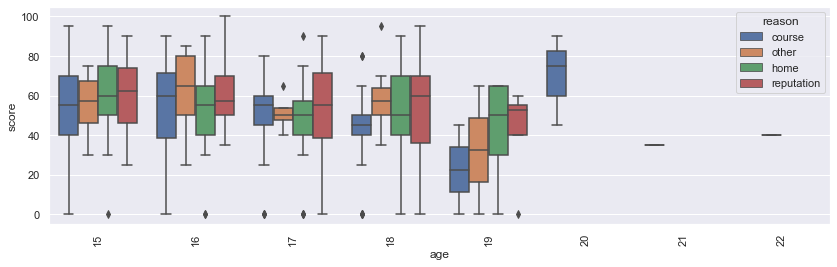

  По оси x: age
  По оси y: score
  Параметр: guardian


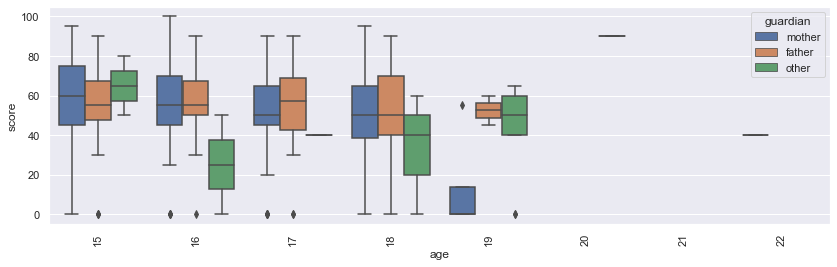

In [195]:
sns_boxplot_score(['age'], num_list)

# Выводы

Общее колличество данных мало, успеваемость берется по 100 бальной системе

Колличество пропущенных значений значительно, но более 10% пропусков имеют только pstatus (совместное проживание родителей) и paid (дополнительные платные занятия по математике)

Имеется довольно много выбросов, особенно в столбце failures. Для их устранения возможно их сведения в рамки верхней и нижней границы

Значение "0" в столбце "score", скорее всего, говорит о том, что эти данные взяты из стран не имеющих гос экзамна по математике

Наиболее важными параметрами являются: 

failures - колличество внеучебных неудач (уменьшает успеваемость)

medu - образование матери (увеличивает успеваемость)

age - возраст (уменьшается успеваемость)

study_time - время на учебу помимо школы (увеличивает успеваемость)

go_out - время с друзьями (уменьшает успеваемость)

 address - городские жители более успешны в учебе

schoolsup - дополнительная образовательная поддержка уменьшает успеваемость в учебе. Скорей всего вызвано тем, что дополнительные занятия дают  увеличение нагрузки на ученика, и как следствие уменьшение в успеваемости по смежным предметам

higher - стремление получить высшее образование увеличивает успеваемость в учебе

internet - наличие домашнего интернета (увеличивает успеваемость в учебе